In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from SOM_clustering.som import SOM

In [2]:
df = pd.read_csv("selected_data.csv")
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(62087, 7)
(38799, 7)


<Axes: >

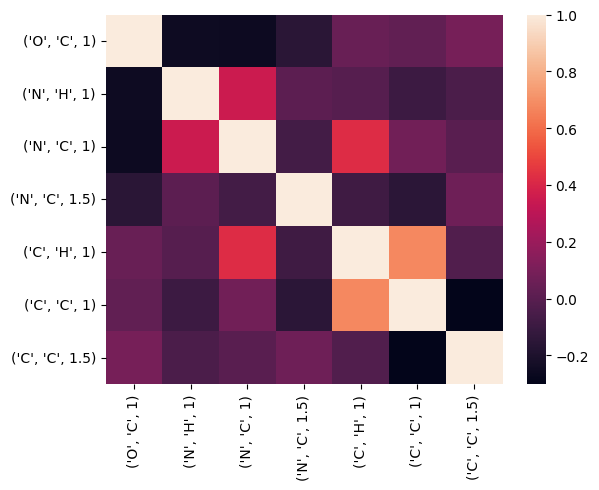

In [4]:
sns.heatmap(df.corr())

In [124]:
X = df.values
model = SOM(m = 2,
            n = 2, 
            dim=X.shape[1],
            max_iter=500,
            initiate_method="SOM++",
            learning_rate=0.00001,
            neighbour_rad=3)
model.fit(X, epoch=100)
model.neurons

array([[[ 2,  1,  2,  0, 19,  8,  0],
        [ 0,  0,  3,  0, 45, 27,  0]],

       [[ 1,  0,  3,  0, 28,  5, 28],
        [ 0,  2, 17,  0, 41,  6,  0]]], dtype=int64)

In [125]:
cluster_centers = model.neurons
cluster_centers = np.reshape(cluster_centers, (-1,X.shape[1]))
cluster_centers.shape

(4, 7)

In [126]:
cc = pd.DataFrame(cluster_centers, columns=df.columns)
cc.dropna(axis=1, inplace=True)
cc.round(4)

,"('O', 'C', 1)","('N', 'H', 1)","('N', 'C', 1)","('N', 'C', 1.5)","('C', 'H', 1)","('C', 'C', 1)","('C', 'C', 1.5)"
0,2,1,2,0,19,8,0
1,0,0,3,0,45,27,0
2,1,0,3,0,28,5,28
3,0,2,17,0,41,6,0


In [27]:
cc.round(4).to_excel("Datas/SOM++_clustercenters.xlsx", index=False)
cc.round(4).to_csv("clustercenters.csv", index=False)